# Modelos
En este notebook definimos e implementamos los modelos. Serán 4 modelos en total usando diferentes técnicas

In [2]:
from sklearn.metrics import *
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.init as init
import importlib
import data
import agente_cnn
import torch
import torch.nn as nn
import torch.nn.functional as F
from itertools import islice
import agente_knn
from torch.utils.data import Subset
import agente_mlp
from sklearn.neighbors import KNeighborsClassifier
from torch.utils.data import DataLoader
importlib.reload(data)
importlib.reload(agente_cnn)
importlib.reload(agente_knn)
importlib.reload(agente_mlp)

<module 'agente_mlp' from 'd:\\Universidad\\Aprendizaje-Automatico-y-Big-Data\\Practica5\\agente_mlp.py'>

Establecemos la ruta donde estan las fotos

Nota: Importante usar la carpeta ./UTKFace que viene incluida en el propio proyecto

In [3]:
path = "./UTKFace"

GENERO = ('Hombre','Mujer')
RAZA = ('Blanco','Negro','Asiático','Indio','Otros')
EDADES = ('0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99','100-109','110-120')

# Modelo 1: KNN-Mbappé

El primer modelo será implementado mediante KNN:

- Usaremos la librería de scikit-learn
- Imagenes en RGB de 200x200 pixeles normalizados
- La edad será dividida o clasificada en grupos
- Separaremos el dataset en 80% entrenamiento y 20% test


Cargamos el dataset: 





In [5]:
# Adaptamos las imagenes a un dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
dataset = data.Dataset(path, transform=transform,target_transform=data.clasificarEdad)  # Pasamos las imagenes a la estructura de datos
train_dataloader, test_dataloader = data.entrenamientoTest(dataset=dataset, test_size=0.2, batch_size=1)

- Género 

Vamos a calcular, empiricamente, el mejor número K de vecinos para el modelo. Esto lo conseguimos haciendo cross validation; sin embargo, no lo vamos a hacer sobre todo el conjunto de entrenamientos sino sobre 1000 imagenes debido a que la librería de scikit learn es un poco ineficiente y requiere cargar muchos datos en memoria RAM

k=1 -> Puntuación media de la validación cruzada: 0.642
k=2 -> Puntuación media de la validación cruzada: 0.6700000000000002
k=3 -> Puntuación media de la validación cruzada: 0.6799999999999999
k=4 -> Puntuación media de la validación cruzada: 0.687
k=5 -> Puntuación media de la validación cruzada: 0.685
k=6 -> Puntuación media de la validación cruzada: 0.6849999999999999
k=7 -> Puntuación media de la validación cruzada: 0.686
k=8 -> Puntuación media de la validación cruzada: 0.691
k=9 -> Puntuación media de la validación cruzada: 0.6950000000000001
k=10 -> Puntuación media de la validación cruzada: 0.693
k=11 -> Puntuación media de la validación cruzada: 0.6910000000000001
k=12 -> Puntuación media de la validación cruzada: 0.688
k=13 -> Puntuación media de la validación cruzada: 0.695
k=14 -> Puntuación media de la validación cruzada: 0.6900000000000001
k=15 -> Puntuación media de la validación cruzada: 0.6860000000000002
k=16 -> Puntuación media de la validación cruzada: 0.694
k=17 -

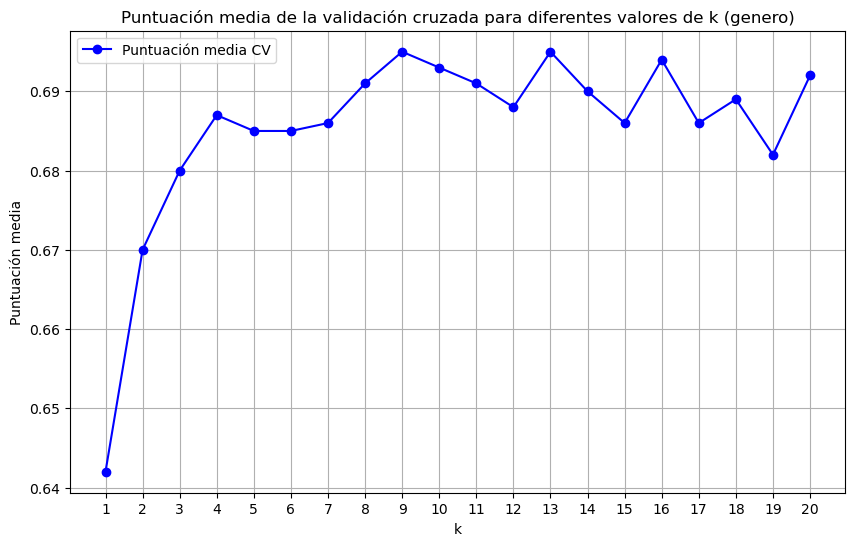

In [16]:
k_genero , _ = agente_knn.encontrar_mejor_k(train_dataloader, categoria= 'genero',num_imagenes=1000, k_range=range(1, 21))

Como ya hemos mencionado, vamos a usar las librerías de Scikit-Learn y  necesitamos cargar en memoria las imagenes.

In [6]:
X_train , Y_train = data.cargarDatos(train_dataloader,num_imagenes= len(train_dataloader),categoria = "genero")

In [7]:
MbappeGenero = KNeighborsClassifier(n_neighbors=9)
MbappeGenero.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=9)

- Edad

Calculamos el mejor K:

k=1 -> Puntuación media de la validación cruzada: 0.26399999999999996
k=2 -> Puntuación media de la validación cruzada: 0.28900000000000003
k=3 -> Puntuación media de la validación cruzada: 0.285
k=4 -> Puntuación media de la validación cruzada: 0.28200000000000003
k=5 -> Puntuación media de la validación cruzada: 0.30500000000000005
k=6 -> Puntuación media de la validación cruzada: 0.309
k=7 -> Puntuación media de la validación cruzada: 0.31
k=8 -> Puntuación media de la validación cruzada: 0.31799999999999995
k=9 -> Puntuación media de la validación cruzada: 0.313
k=10 -> Puntuación media de la validación cruzada: 0.333
k=11 -> Puntuación media de la validación cruzada: 0.328
k=12 -> Puntuación media de la validación cruzada: 0.335
k=13 -> Puntuación media de la validación cruzada: 0.33499999999999996
k=14 -> Puntuación media de la validación cruzada: 0.32999999999999996
k=15 -> Puntuación media de la validación cruzada: 0.339
k=16 -> Puntuación media de la validación cruzada: 0.3339

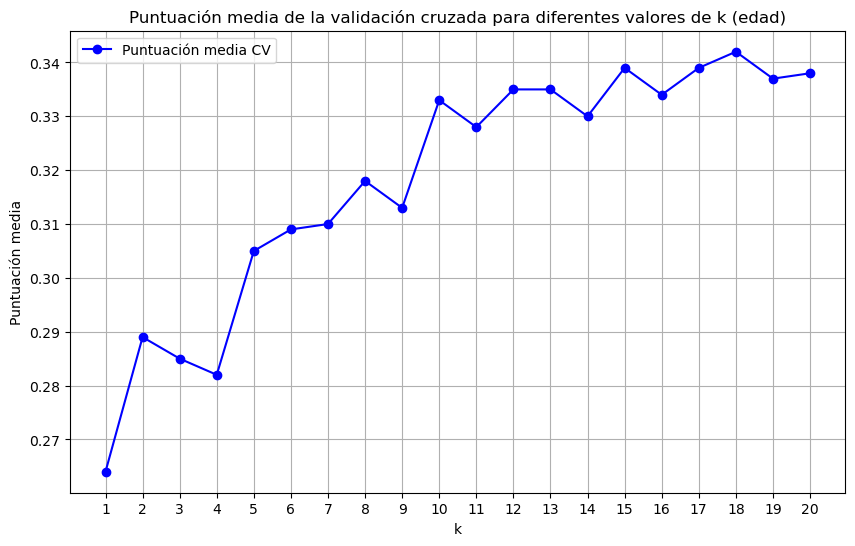

In [ ]:
k_edad , _ = agente_knn.encontrar_mejor_k(train_dataloader, categoria= 'edad',num_imagenes=1000, k_range=range(1, 21))

Cargamos las imagenes en memoria

In [8]:
X_train , Y_train = data.cargarDatos(train_dataloader,num_imagenes= len(train_dataloader),categoria = "edad")

In [9]:
MbappeEdad = KNeighborsClassifier(n_neighbors=18)
MbappeEdad.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=18)

- Raza

Volvemos a repetir el proceso


k=1 -> Puntuación media de la validación cruzada: 0.41900000000000004
k=2 -> Puntuación media de la validación cruzada: 0.462
k=3 -> Puntuación media de la validación cruzada: 0.462
k=4 -> Puntuación media de la validación cruzada: 0.48199999999999993
k=5 -> Puntuación media de la validación cruzada: 0.499
k=6 -> Puntuación media de la validación cruzada: 0.503
k=7 -> Puntuación media de la validación cruzada: 0.507
k=8 -> Puntuación media de la validación cruzada: 0.495
k=9 -> Puntuación media de la validación cruzada: 0.49400000000000005
k=10 -> Puntuación media de la validación cruzada: 0.5010000000000001
k=11 -> Puntuación media de la validación cruzada: 0.49800000000000005
k=12 -> Puntuación media de la validación cruzada: 0.496
k=13 -> Puntuación media de la validación cruzada: 0.495
k=14 -> Puntuación media de la validación cruzada: 0.49800000000000005
k=15 -> Puntuación media de la validación cruzada: 0.5
k=16 -> Puntuación media de la validación cruzada: 0.49700000000000005
k=

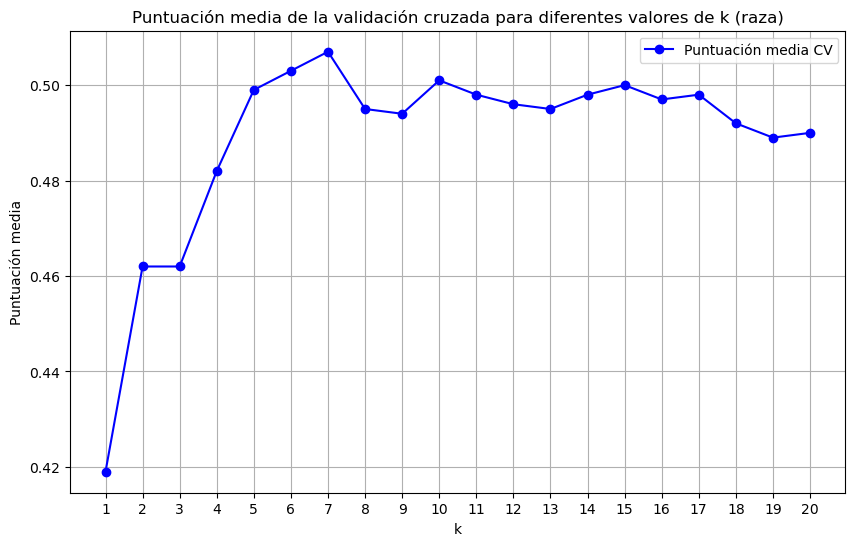

In [63]:
k_raza , _ = agente_knn.encontrar_mejor_k(train_dataloader, categoria= 'raza',num_imagenes=1000, k_range=range(1, 21))

In [10]:
MbappeRaza = KNeighborsClassifier(n_neighbors=7)

X_train , Y_train = data.cargarDatos(train_dataloader,num_imagenes= len(train_dataloader),categoria = "raza")
MbappeRaza.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

## Resultados KNN 

Veamos como se comporta el modelo.Primero cargamos el conjunto de Test y luego calculamos las predicciones con los correspondientes modelos:

In [ ]:
#Cargar datos
X_test, Y_edades = data.cargarDatos(test_dataloader,num_imagenes= len(test_dataloader),categoria = "edad")
_, Y_generos = data.cargarDatos(test_dataloader,num_imagenes= len(test_dataloader),categoria = "genero")
_, Y_razas = data.cargarDatos(test_dataloader,num_imagenes= len(test_dataloader),categoria = "raza")

In [ ]:
#Resultados
y_pred_edades = MbappeEdad.predict(X_test)
y_pred_generos = MbappeGenero.predict(X_test)
y_pred_razas = MbappeRaza.predict(X_test)

In [ ]:
metricasGenero = classification_report(Y_generos, y_pred_generos,target_names=GENERO)
metricasRaza = classification_report(Y_razas, y_pred_razas,target_names=RAZA)
metricasEdad = classification_report(Y_edades, y_pred_edades,target_names=EDADES)

- Genero

              precision    recall  f1-score   support

      Hombre       0.73      0.80      0.76      2483
       Mujer       0.75      0.68      0.71      2259

    accuracy                           0.74      4742
   macro avg       0.74      0.74      0.74      4742
weighted avg       0.74      0.74      0.74      4742



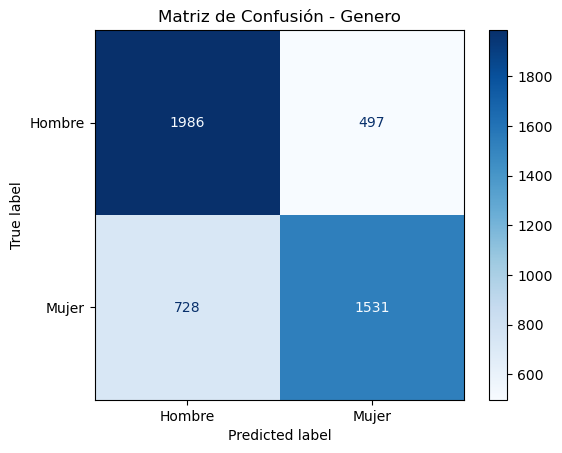

In [ ]:
print(metricasGenero)
matrizGenero = confusion_matrix(Y_generos, y_pred_generos)
disp = ConfusionMatrixDisplay(confusion_matrix=matrizGenero,display_labels = GENERO)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Genero")
plt.show()

- Raza

              precision    recall  f1-score   support

      Blanco       0.52      0.86      0.65      1969
       Negro       0.64      0.43      0.51       892
    Asiático       0.47      0.26      0.33       708
       Indio       0.49      0.26      0.34       835
       Otros       0.21      0.04      0.07       338

    accuracy                           0.52      4742
   macro avg       0.47      0.37      0.38      4742
weighted avg       0.51      0.52      0.48      4742



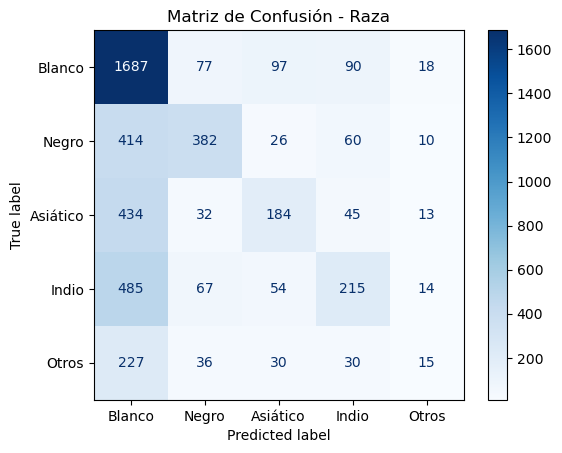

In [ ]:
print(metricasRaza)
matrizRaza = confusion_matrix(Y_razas, y_pred_razas)
disp = ConfusionMatrixDisplay(confusion_matrix=matrizRaza, display_labels=RAZA)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Raza")
plt.show()

- Edad

              precision    recall  f1-score   support

         0-9       0.57      0.73      0.64       601
       10-19       0.17      0.05      0.08       284
       20-29       0.44      0.65      0.53      1501
       30-39       0.24      0.25      0.25       888
       40-49       0.17      0.09      0.12       466
       50-59       0.22      0.19      0.21       471
       60-69       0.21      0.07      0.11       260
       70-79       0.11      0.01      0.03       137
       80-89       0.00      0.00      0.00       101
       90-99       0.00      0.00      0.00        30
     100-109       0.00      0.00      0.00         1
     110-120       0.00      0.00      0.00         2

    accuracy                           0.38      4742
   macro avg       0.18      0.17      0.16      4742
weighted avg       0.32      0.38      0.34      4742



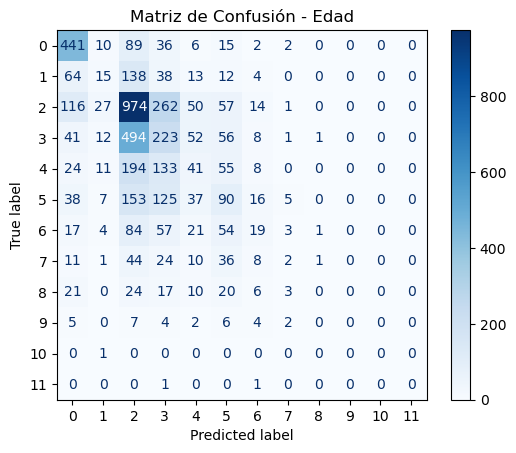

In [19]:
print(metricasEdad)
matrizEdad = confusion_matrix(Y_edades, y_pred_edades)
disp = ConfusionMatrixDisplay(confusion_matrix=matrizEdad,display_labels = ['0','1','2','3', '4','5','6','7','8','9','10','11'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Edad")
plt.show()

Obtenemos resultados decentes:
- GENERO : buen comportamiento con una tasa de aciertos del 75%% tanto para hombres como mujeres.Aun así, vemos que el modelo es bastante mas exhaustivo con hombres y en consecuencia
es capaz de predecir mas hombres correctamente que mujeres
- RAZA:  roza casi el aprobado con un 47% de tasa de acierto. La clase que mejor se le da es BLANCO
- EDAD: deja bastante que desear, pero no se la del todo mal la clase 0 y la clase 2: 0-9 años y 20-29 años respectivamente. Justo las clases que mas abundan en el dataset

Los resultados no son malos del todo, pero tienen margen de mejora.

# Modelo 2: MLP-Napoleón

En este modelo vamos a implementar mediante Pytorch una red neuronal. En este modelo usaremos imagenes RGB de 64x64 pixeles normalizados

Definimos una clase para poder implementar los modelos:

- 1º capa : 3*64*64 nodos entrada -> 512 nodos salida
- 2º capa : 512 nodos entrada -> 256 nodos salida
- 3º capa : 256 nodos salida -> num_clases nodos salida (dependerá del problema a resolver: edad,genero,raza)

In [25]:
class MLP(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MLP, self).__init__()
        # Definir las capas del MLP
        self.fc1 = nn.Linear(input_size, 512)  # Capa de entrada -> 512 unidades
        self.fc2 = nn.Linear(512, 256)         # Capa oculta -> 256 unidades
        self.fc3 = nn.Linear(256, num_classes) # Capa de salida -> número de clases

    def forward(self, x):
        # Aplanar las imágenes de tamaño (batch_size, 3, 64, 64) a (batch_size, 12288)
        x = x.view(x.size(0), -1)  # Aplanar las imágenes a un vector 1D por imagen
        x = F.relu(self.fc1(x))    # Capa 1 -> ReLU
        x = F.relu(self.fc2(x))    # Capa 2 -> ReLU
        x = self.fc3(x)            # Capa 3 -> Salida
        return x

Preparamos el dataset: 80% entrenamiento, 20% test

In [16]:
# Transformación que redimensiona las imágenes y las normaliza
transform = transforms.Compose([ 
    transforms.Resize((64, 64)),             # Redimensiona las imágenes a 64x64
    transforms.ToTensor(),                   # Convierte las imágenes a tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normaliza las imágenes
])

dataset = data.Dataset(path, transform=transform,target_transform=data.clasificarEdad)
train_dataloader,test_dataloader = data.entrenamientoTest(dataset=dataset,test_size=0.2,batch_size=4)

- Genero (20 epochs)

In [ ]:
NapoleonGenero = MLP(input_size=64*64*3, num_classes=2)
train_losses, train_accuracies, test_losses, test_accuracies = agente_mlp.train_and_evaluate(NapoleonGenero, train_dataloader, test_dataloader, etiqueta='genero', num_epochs=20)
torch.save(NapoleonGenero.state_dict(), './Modelos/NapoleonGenero.pth')

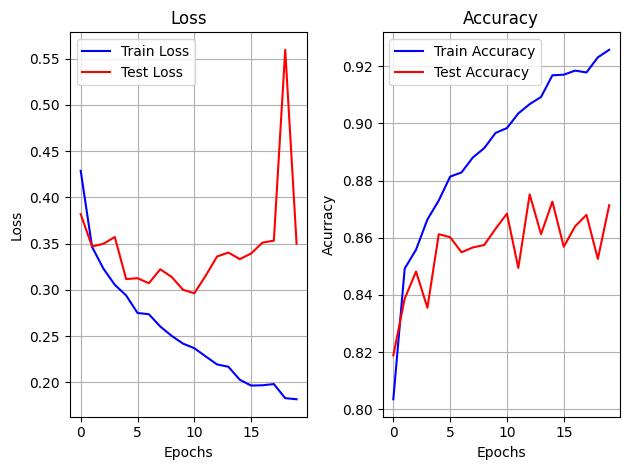

In [ ]:
data.graficaEntrenamiento(train_losses,train_accuracies,test_losses,test_accuracies,epochs=20,nombre="entrenamientoGenero")

Vemos que entre los 10 y 15 epochs el modelo está sobre aprendiendo. Lo óptimo hubiese sido parar ahi el entrenamiento

In [26]:
#Ejecutar para cargar el modelo ya entrenado
NapoleonGenero = MLP(input_size=64*64*3, num_classes=2)
NapoleonGenero.load_state_dict(torch.load('./Modelos/NapoleonGenero.pth'))

<All keys matched successfully>

- Edad (20 epochs)

In [ ]:
NapoleonEdad = MLP(input_size=64*64*3, num_classes=10)
train_losses, train_accuracies, test_losses, test_accuracies = agente_mlp.train_and_evaluate(MlpEdad, train_dataloader, test_dataloader, etiqueta='edad', num_epochs=20)
torch.save(NapoleonEdad.state_dict(), './Modelos/NapoleonEdad.pth')

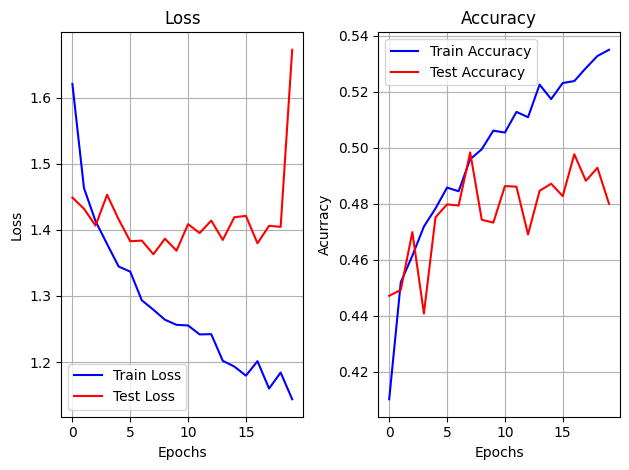

In [ ]:
data.graficaEntrenamiento(train_losses,train_accuracies,test_losses,test_accuracies,epochs=20,nombre="entrenamientoEdad")

Aquí lo optimo hubiese sido parar el entrenamiento entre los 5 y 10 epochs, donde se ve que el modelo tiene una mayor tasa de aciertos superando incluso el del conjunto de entrenamiento

In [27]:
#Ejecutar para cargar el modelo ya entrenado
NapoleonEdad = MLP(input_size=64*64*3, num_classes=10)
NapoleonEdad.load_state_dict(torch.load('./Modelos/NapoleonEdad.pth'))

<All keys matched successfully>

- Raza (20 epochs)

In [ ]:
NapoleonRaza = MLP(input_size=64*64*3, num_classes=5)
train_losses, train_accuracies, test_losses, test_accuracies = agente_mlp.train_and_evaluate(NapoleonRaza, train_dataloader, test_dataloader, etiqueta='raza', num_epochs=20)
torch.save(NapoleonRaza.state_dict(), './Modelos/NapoleonRaza.pth')

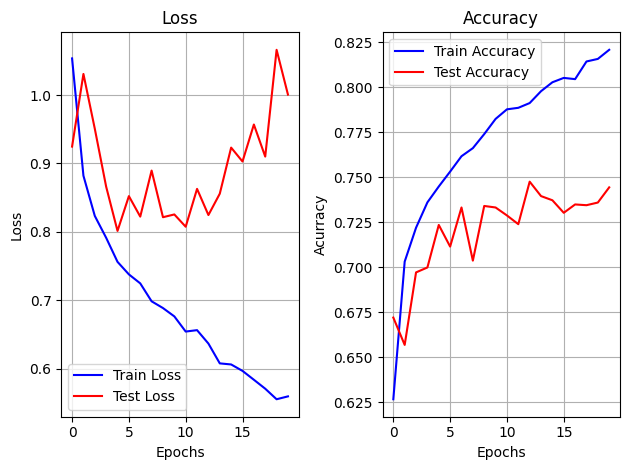

In [ ]:
data.graficaEntrenamiento(train_losses,train_accuracies,test_losses,test_accuracies,epochs=20,nombre="entrenamientoRaza")

In [28]:
#Ejecutar para cargar el modelo ya entrenado
NapoleonRaza = MLP(input_size=64*64*3, num_classes=5)
NapoleonRaza.load_state_dict(torch.load('./Modelos/NapoleonRaza.pth'))

<All keys matched successfully>

## Resultados MLP-Napoleon
Para evaluar el modelo vamos a usar las librerías de scikit learn, pues nos permiten de manera rapida calcular las distintas métricas. Sin embargo, es necesario cargar en vectores tanto las etiquetas reales como las etiquetas predichas, por lo que, para este modelo, hemos implementado una funcion llamada "evaluar" que se encargue de ello

In [ ]:
generoTotal, generoPredTotal = agente_mlp.evaluar(NapoleonGenero, test_dataloader,etiqueta='genero')
edadTotal, edadPredTotal = agente_mlp.evaluar(NapoleonEdad, test_dataloader,etiqueta='edad')
razaTotal, razaPredTotal = agente_mlp.evaluar(NapoleonRaza, test_dataloader,etiqueta='raza')

In [ ]:
metricasGenero = classification_report(generoTotal, generoPredTotal,target_names=GENERO)
metricasRaza = classification_report(razaTotal, razaPredTotal,target_names=RAZA)
metricasEdad = classification_report(edadTotal, edadPredTotal,target_names=EDADES)

- Genero

              precision    recall  f1-score   support

      Hombre       0.87      0.89      0.88      2483
       Mujer       0.88      0.85      0.86      2259

    accuracy                           0.87      4742
   macro avg       0.87      0.87      0.87      4742
weighted avg       0.87      0.87      0.87      4742



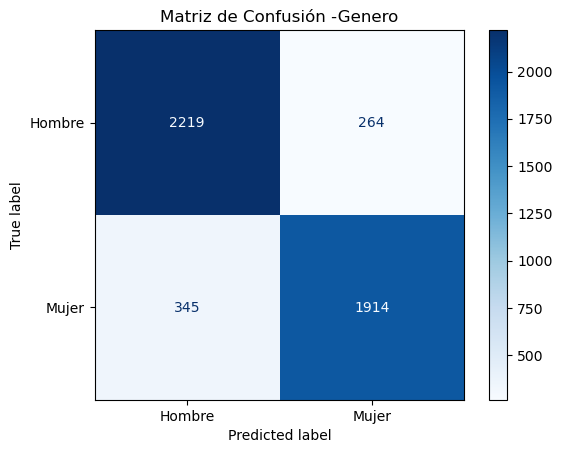

In [55]:
print(metricasGenero)
matrizGenero= confusion_matrix(generoTotal, generoPredTotal)
disp = ConfusionMatrixDisplay(confusion_matrix=matrizGenero,display_labels =GENERO)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión -Genero")
plt.show()

- Edad

              precision    recall  f1-score   support

         0-9       0.84      0.81      0.83       601
       10-19       0.51      0.30      0.38       284
       20-29       0.57      0.75      0.65      1501
       30-39       0.34      0.20      0.25       888
       40-49       0.26      0.37      0.30       466
       50-59       0.34      0.28      0.30       471
       60-69       0.28      0.18      0.22       260
       70-79       0.00      0.00      0.00       137
       80-89       0.22      0.50      0.30       101
       90-99       0.50      0.07      0.12        30
     100-109       0.00      0.00      0.00         1
     110-120       0.00      0.00      0.00         2

    accuracy                           0.48      4742
   macro avg       0.32      0.29      0.28      4742
weighted avg       0.46      0.48      0.46      4742



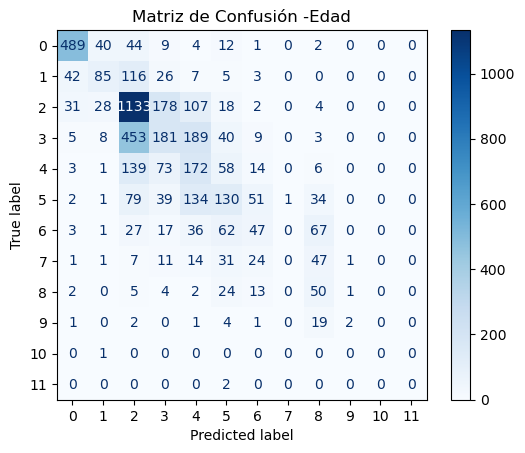

In [57]:
print(metricasEdad)
matrizEdad= confusion_matrix(edadTotal, edadPredTotal)
disp = ConfusionMatrixDisplay(confusion_matrix=matrizEdad)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión -Edad")
plt.show()

- Raza

              precision    recall  f1-score   support

      Blanco       0.80      0.77      0.79      1969
       Negro       0.73      0.86      0.79       892
    Asiático       0.69      0.74      0.71       708
       Indio       0.69      0.70      0.70       835
       Otros       0.33      0.21      0.26       338

    accuracy                           0.73      4742
   macro avg       0.65      0.66      0.65      4742
weighted avg       0.72      0.73      0.72      4742



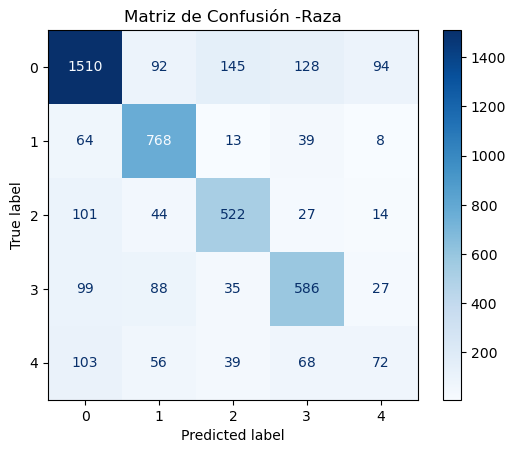

In [59]:
print(metricasRaza)
matrizRaza= confusion_matrix(razaTotal, razaPredTotal)
disp = ConfusionMatrixDisplay(confusion_matrix=matrizRaza)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión -Raza")
plt.show()

En este modelo obtenemos en general, mejores resultados que el primero:
- GENERO : muy buen comportamiento con una tasa de aciertos del 87% tanto para hombres como mujeres. Sin embargo, vemos que el modelo es mas exhaustivo con hombres
- RAZA: buen comportamiento, aunque no tanto como el GENERO pues tenemos una tasa de aciertos del 65%
- EDAD: el comportamiento en general no es muy bueno; sin embargo, es bastante bueno con edades de entre 0 y 29 años, en especial entre 0 y 9. Lo cual tiene sentido
pues si recordamos el analisis del dataset eran las clases que mas abundaban en el dataset

En general, hemos conseguido mejorar bastante los resultados con respecto al primer modelo.



# Modelo 3: CNN-Denzel Washington

En este modelo implementaremos una red convolucional con las siguientes características:

In [29]:
class DenzelWashington(nn.Module):
    def __init__(self,output_layers):
        super().__init__()

        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 12, 5)
        self.pool2 = nn.MaxPool2d(4, 4)
       
        self.fc1 = nn.Linear(12 * 11 * 11, 500)
        self.fcout = nn.Linear(500, output_layers)

        self.apply(self._init_weights)  # Aplicar la inicialización de pesos

    def _init_weights(self, m):
        """Inicializa los pesos de la red"""
        if isinstance(m, (nn.Conv2d, nn.Linear)):
            init.normal_(m.weight, mean=0.0, std=0.02)
            if m.bias is not None:
                init.constant_(m.bias, 0)

    def forward(self, x):

        x = self.pool1(x) #3 fotos 
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = self.fcout(x)
        return x

Cargamos el dataset:
- Imagenes RGB 200x200 normalizadas
- Entrenamiento 80%, Test 20%

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) #Esto normalizara las imagenes
dataset = data.Dataset(path,transform=transform) #Pasamos las imagenes a la estructura de datos
train_dataloader,test_dataloader = data.entrenamientoTest(dataset=dataset,test_size=0.2,batch_size=4)

In [30]:
#Ejecutar si no se va a entrenar
device = "cpu"

In [ ]:
#Dispositivo en el que entrenar el modelo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Entrenando en: {device}")

Entrenando en: cuda


Instanciamos los modelos y los agrupamos en un objeto de la clase Agente.
Cada red tiene su propia medida de error. 

En este caso cabe destacar que el modelo intentará predecir la edad EXACTA y en consecuencia usaremos el error cuadratico medio (MSE) 
para calcular el error.

Para el resto usaremos CrossEntropyLoss pues se trata de problemas de clasificacion

In [31]:
#Modelo edad
DWEdad = DenzelWashington(output_layers=1).to(device)
mseLoss = nn.MSELoss()

#Modelo Genero
DWGenero = DenzelWashington(output_layers=2).to(device)
entropyLossGen = nn.CrossEntropyLoss()

#Modelo raza
DWRaza = DenzelWashington(output_layers=5).to(device)
entropyLossRaza = nn.CrossEntropyLoss()

agenteDW = agente_cnn.Agente(modeloEdad=DWEdad,
                         modeloGenero=DWGenero,
                         modeloRaza=DWRaza,
                         criterioEdad=mseLoss,
                         criterioGenero=entropyLossGen,
                         criterioRaza=entropyLossRaza,
                         device=device,
                         lr = 0.0001)

- Género (20 epochs)

In [ ]:
train_loss_Genero,train_accuracy_Genero,test_loss_Genero,test_accuracy_Genero = agenteDW.entrenarModelo(train_dataloader,test_dataloader,"Genero",num_epochs=20)
torch.save(agenteDW.modeloGenero.state_dict(), './/Modelos//DWGenero.pth')
#17 mins

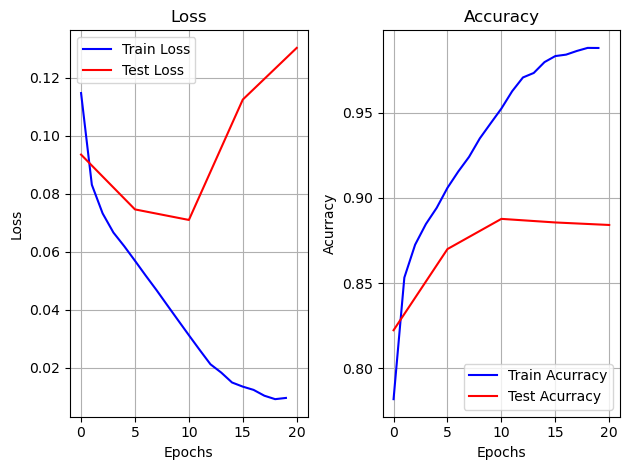

In [ ]:
data.graficaEntrenamiento(train_loss_Genero,train_accuracy_Genero,test_loss_Genero,test_accuracy_Genero,epochs= 20,nombre="entrenamientoGeneroDW")

El modelo sobreaprende a partir del epoch 10

- Edad (150 epochs)


In [ ]:
train_loss_Edad,train_accuracy_Edad,test_loss_Edad,test_accuracy_Edad = agenteDW.entrenarModelo(train_dataloader,test_dataloader,"Edad",num_epochs=150)
torch.save(agenteDW.modeloEdad.state_dict(), './/Modelos//DWEdad.pth')
#2 horas

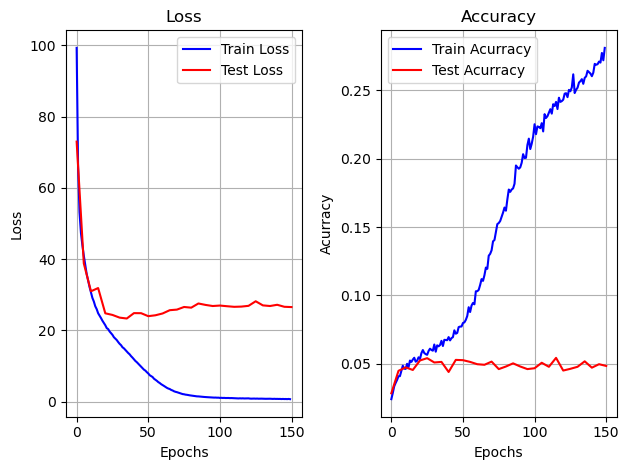

In [ ]:
data.graficaEntrenamiento(train_loss_Edad,train_accuracy_Edad,test_loss_Edad,test_accuracy_Edad,epochs=150,nombre="entrenamientoEdadDW")

Vemos que el numero tan elevado de epochs es innecesario, pues no se obtiene una mejora sobre el conjunto de test. Sin embargo, a pesar de que se ve claramente que el modelo sobreaprende, la tasa de aciertos sobre el conjunto de entrenamiento no es tan alta: un 25%

- Raza: 30 epochs

In [ ]:
train_loss_Raza,train_accuracy_Raza,test_loss_Raza,test_accuracy_Raza = agenteDW.entrenarModelo(train_dataloader,test_dataloader,"Raza",num_epochs=30)
torch.save(agenteDW.modeloRaza.state_dict(), './/Modelos//DWRaza.pth')
#25 mins

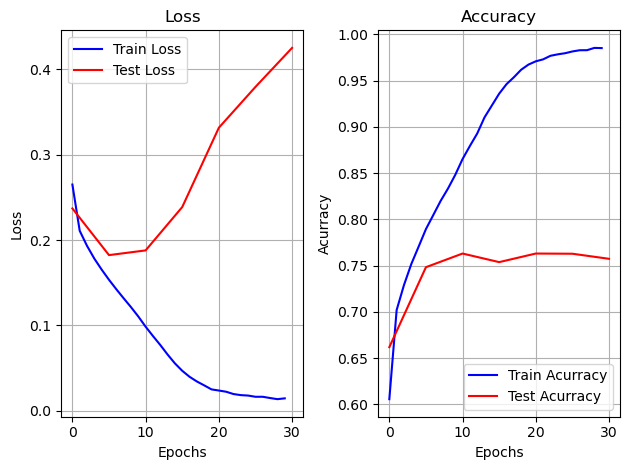

In [ ]:
data.graficaEntrenamiento(train_loss_Raza,train_accuracy_Raza,test_loss_Raza,test_accuracy_Raza,epochs=30,nombre="entrenamientoRazaDW")

In [32]:
#Ejecutar para cargar el modelo ya entrenado
agenteDW.modeloEdad.load_state_dict(torch.load('./Modelos/DWEdad.pth'))
agenteDW.modeloGenero.load_state_dict(torch.load('./Modelos/DWGenero.pth'))
agenteDW.modeloRaza.load_state_dict(torch.load('./Modelos/DWRaza.pth'))

<All keys matched successfully>

## Resultados CNN-Denzel Washington

Como hemos comentado antes, al usar las librerías de Scikit learn es necesario cargar los datos en vectores: definimos la funcion "resultados"

In [82]:
edadesTotal,edadesPredTotal,generosTotal,generosPredTotal,razasTotal,razasPredTotal = agenteDW.resultados(test_dataloader)

- Genero

              precision    recall  f1-score   support

      Hombre       0.89      0.89      0.89      2483
       Mujer       0.88      0.88      0.88      2259

    accuracy                           0.88      4742
   macro avg       0.88      0.88      0.88      4742
weighted avg       0.88      0.88      0.88      4742



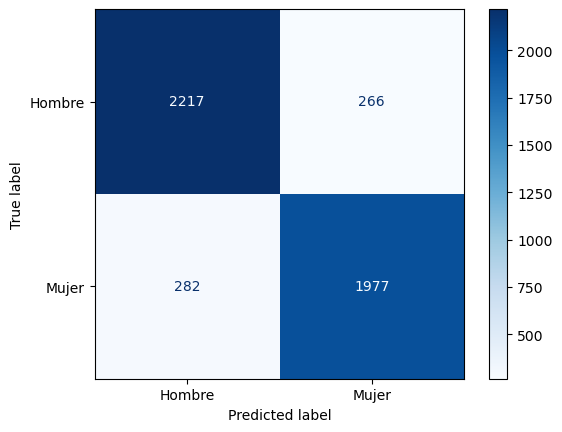

In [96]:
metricasGenero = classification_report(generosTotal, generosPredTotal,target_names=GENERO)
print(metricasGenero)
matrizGenero = confusion_matrix(generosTotal, generosPredTotal)
disp = ConfusionMatrixDisplay(confusion_matrix=matrizGenero,display_labels=GENERO)
disp.plot(cmap = plt.cm.Blues)
plt.show()

- Edad

In [85]:
print("Tasa de aciertos de la red en EDAD: ",accuracy_score(edadesTotal, edadesPredTotal)*100, "%")

Tasa de aciertos de la red en EDAD:  4.8291859974694225 %


El modelo no es capaz de determinar la edad exacta ¿ pero cuanto se equivoca? Error absoluto medio 

In [86]:
print(f'Error absoluto medio(Edad): {mean_absolute_error(edadesTotal, edadesPredTotal)}')

Error absoluto medio(Edad): 7.564318852804724


- Raza

              precision    recall  f1-score   support

      Blanco       0.80      0.83      0.82      1969
       Negro       0.80      0.82      0.81       892
    Asiático       0.85      0.75      0.80       708
       Indio       0.66      0.74      0.70       835
       Otros       0.40      0.29      0.34       338

    accuracy                           0.76      4742
   macro avg       0.70      0.69      0.69      4742
weighted avg       0.76      0.76      0.76      4742



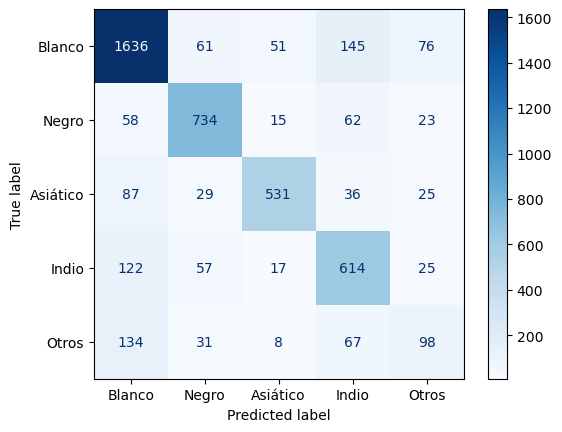

In [87]:
metricasRaza = classification_report(razasTotal, razasPredTotal,target_names=RAZA)
print(metricasRaza)
matrizRaza = confusion_matrix(razasTotal, razasPredTotal)
disp = ConfusionMatrixDisplay(confusion_matrix=matrizRaza,display_labels=RAZA)
disp.plot(cmap = plt.cm.Blues)
plt.show()


Volvemos a obtener mejores resultados:
- GENERO : muy buen comportamiento con una tasa de aciertos del 88%. Sin embargo, se le da mejor predecir hombres que mujeres, pero la diferencia es minima
- RAZA: buen comportamiento, aunque no tanto como el GENERO pues tenemos una tasa de aciertos del 70%. Vemos que, comparados con las otras clases, le cuesta
la clase INDIO y OTROS, en especial esta última
- EDAD: si nos centramos solo en la tasa de acierto, obviamente  el resultado es muy malo, peor incluso que los anteriores modelos.Aun así, tenemos que tener en cuenta que el modelo
intenta predecir la edad exacta, por lo que tenemos que usar otra metrica, es decir, tenemos que ver cuanto se equivoca: en este caso, el margen de error es de 7 años lo cual no es tan malo


En general, al igual que antes hemos conseguido los resultados con respecto  a los anteriores, pero la diferencia es minima. Sin embargo, creemos que este modelo puede ser mejor que los otros en tema de la EDAD, pues los intervalos en los que se clasfican las edades de los primeros modelos son de 10 años y aqui el margen error es de 7 años

# Modelo 4: CNN-Lola Lolita
Para este ultimo modelo volvemos a usar una red convolucional pero mas compleja que la anterior, es decir, con mas capas convolucionales y filtros:


- Imagenes RGB 200x200 pixeles


In [33]:
class LolaLolita(nn.Module):
    def __init__(self,output_layers):
        super().__init__()

        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=6, kernel_size=3)
        self.conv2 = nn.Conv2d(6, 12, 4)
        self.conv3 = nn.Conv2d(12,24,6)
        self.conv4 =  nn.Conv2d(24,48,16)
        self.pool2 = nn.MaxPool2d(3, 3)
       
        self.fc1 = nn.Linear(48 * 100, 1200)
        self.fc2 = nn.Linear(1200, 850)
        self.fcout = nn.Linear(850, output_layers)

        self.apply(self._init_weights)  # Aplicar la inicialización de pesos

    def _init_weights(self, m):
        """Inicializa los pesos de la red"""
        if isinstance(m, (nn.Conv2d, nn.Linear)):
            init.normal_(m.weight, mean=0.0, std=0.02)
            if m.bias is not None:
                init.constant_(m.bias, 0)

    def forward(self, x):

        x = self.pool1(x) 
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool1(F.relu(self.conv3(x)))
        x = self.pool2(F.relu(self.conv4(x)))
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fcout(x)
        return x

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Entrenando en: {device}")

Al igual que el modelo CNN-Denzel Washington, este tambien intentará predecir la edad exacta por lo que usamos mismas medidas de error 

In [34]:
#Modelo edad
LLEdad = LolaLolita(output_layers=1).to(device)
mseLoss = nn.MSELoss()

#Modelo Genero
LLGenero = LolaLolita(output_layers=2).to(device)
entropyLossGen = nn.CrossEntropyLoss()

#Modelo raza
LLRaza = LolaLolita(output_layers=5).to(device)
entropyLossRaza = nn.CrossEntropyLoss()

agenteLL= agente_cnn.Agente(modeloEdad=LLEdad,
                         modeloGenero=LLGenero,
                         modeloRaza=LLRaza,
                         criterioEdad=mseLoss,
                         criterioGenero=entropyLossGen,
                         criterioRaza=entropyLossRaza,
                         device=device,
                         lr = 0.00001)

- Género (30 epochs)

In [ ]:
train_loss_Genero,train_accuracy_Genero,test_loss_Genero,test_accuracy_Genero = agenteLL.entrenarModelo(train_dataloader,test_dataloader,"Genero",num_epochs=30)
torch.save(agenteLL.modeloGenero.state_dict(), './/Modelos//LLGenero.pth')
#40 mins

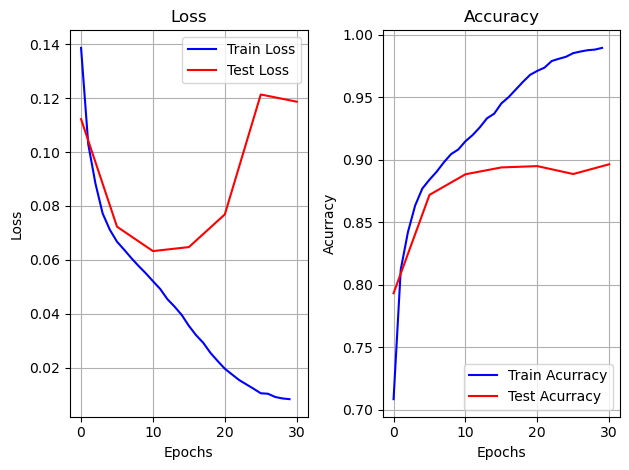

In [ ]:
data.graficaEntrenamiento(train_loss_Genero,train_accuracy_Genero,test_loss_Genero,test_accuracy_Genero,epochs=30,nombre="entrenamientoGeneroLL")

- Edad (100 epochs)

In [ ]:
train_loss_Edad,train_accuracy_Edad,test_loss_Edad,test_accuracy_Edad = agenteLL.entrenarModelo(train_dataloader,test_dataloader,"Edad",num_epochs=100)
torch.save(agenteLL.modeloEdad.state_dict(), './/Modelos//LLEdad.pth')
#3 horas

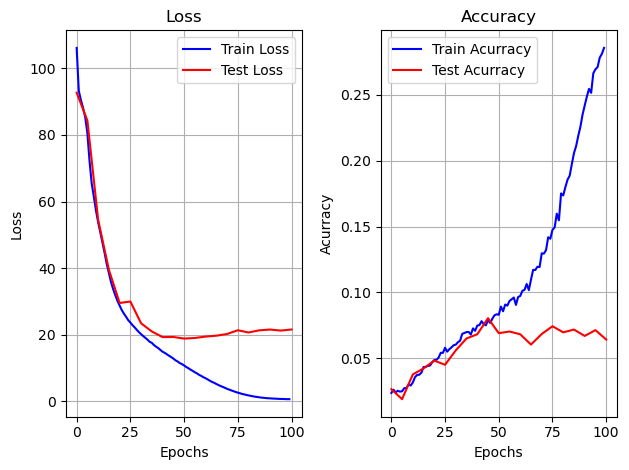

In [ ]:
data.graficaEntrenamiento(train_loss_Edad,train_accuracy_Edad,test_loss_Edad,test_accuracy_Edad,epochs=100,nombre="entrenamientoEdadLL")

Teniendo en cuenta los resultados del modelo anterior, decidimos reducir el numero de epochs en 100. No obstante, observando la gráfica vemos que lo mejor hubiese sido reducirlo a 40-50 epochs. Al igual que antes, el modelo sobreaprende pero la tasa de aciertos sobre el conjunto de entrenamiento es de un 25% por lo que "no sobreaprende tanto"

- Raza (30 epochs)

In [ ]:
train_loss_Raza,train_accuracy_Raza,test_loss_Raza,test_accuracy_Raza = agenteLL.entrenarModelo(train_dataloader,test_dataloader,"Raza",num_epochs=30)
torch.save(agenteLL.modeloRaza.state_dict(), './/Modelos//LLRaza.pth')
#45 mins

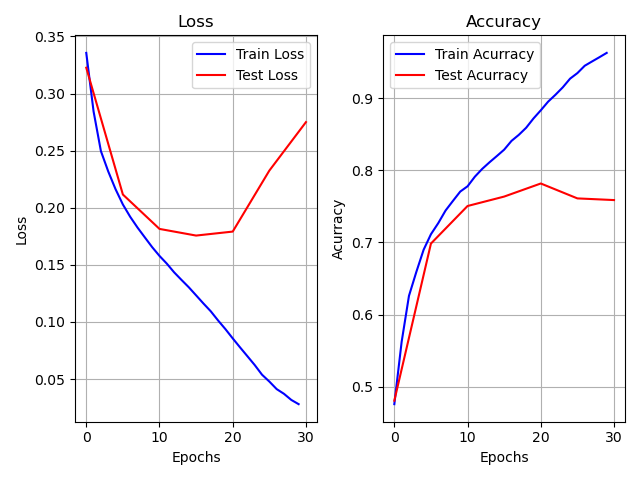

In [ ]:
data.graficaEntrenamiento(train_loss_Raza,train_accuracy_Raza,test_loss_Raza,test_accuracy_Raza,epochs=30,nombre="entrenamientoRazaLL")

In [42]:
#Ejecutar para cargar el modelo ya entrenado
agenteLL.modeloEdad.load_state_dict(torch.load('./Modelos/LLEdad.pth'))
agenteLL.modeloGenero.load_state_dict(torch.load('./Modelos/LLGenero.pth'))
agenteLL.modeloRaza.load_state_dict(torch.load('./Modelos/LLRaza.pth'))

<All keys matched successfully>

## Resultados CNN-Lola Lolita

In [94]:
edades,edadesPred,generos,generosPred,razas,razasPred = agenteLL.resultados(test_dataloader)

- Genero

              precision    recall  f1-score   support

      Hombre       0.92      0.88      0.90      2483
       Mujer       0.87      0.92      0.89      2259

    accuracy                           0.90      4742
   macro avg       0.90      0.90      0.90      4742
weighted avg       0.90      0.90      0.90      4742



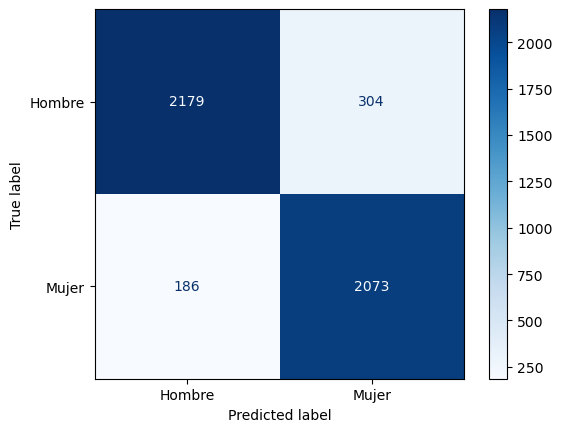

In [103]:
metricasGenero = classification_report(generos, generosPred,target_names=GENERO)
print(metricasGenero)
matrizGenero = confusion_matrix(generos, generosPred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrizGenero,display_labels=GENERO)
disp.plot(cmap = plt.cm.Blues)
plt.show()

- Edad

In [100]:
print("Tasa de aciertos de la red en EDAD: ",accuracy_score(edades, edadesPred)*100, "%")
print(f'Error absoluto medio(Edad): {mean_absolute_error(edades, edadesPred)}')

Tasa de aciertos de la red en EDAD:  7.001265288907634 %
Error absoluto medio(Edad): 6.655208772669759


- Raza

              precision    recall  f1-score   support

      Blanco       0.83      0.80      0.81      1969
       Negro       0.82      0.80      0.81       892
    Asiático       0.76      0.84      0.80       708
       Indio       0.69      0.73      0.71       835
       Otros       0.33      0.30      0.31       338

    accuracy                           0.76      4742
   macro avg       0.69      0.69      0.69      4742
weighted avg       0.76      0.76      0.76      4742



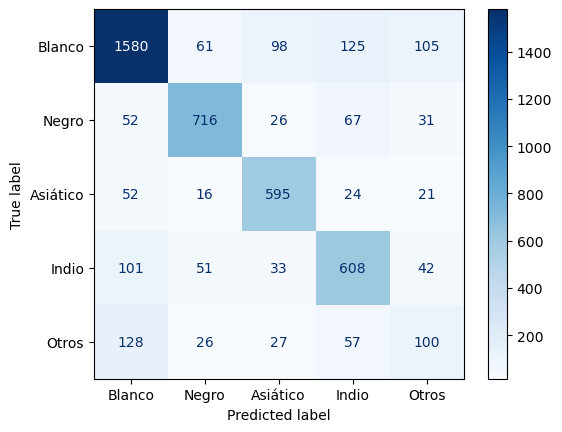

In [102]:
metricasRaza = classification_report(razas, razasPred,target_names=RAZA)
print(metricasRaza)
matrizRaza = confusion_matrix(razas, razasPred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrizRaza,display_labels=RAZA)
disp.plot(cmap = plt.cm.Blues)
plt.show()

Seguimos mejorando los  resultados:
- GENERO : muy buen comportamiento con una tasa de aciertos del 90%. Aqui el modelo tiene mayor tasa de aciertos hombres pero es mas exhaustivo con las mujeres, es decir,
tiene mejor capacidad de detectar a todas las mujeres posibles
- RAZA: buen comportamiento, aunque no tanto como el GENERO pues tenemos una tasa de aciertos del 69%. Vemos que, comparados con las otras clases, le cuesta
la clase INDIO y OTROS, en especial esta última
- EDAD: tenemos una tasa de acierto de un 7% pero como hemos comentado antes esto no nos dice nada. Vemos entonces que el margen de error es de 6,66 años


Finalmente hemos conseguido mejorar aun mas los resultados, pero las mejoras son infimas

# Resultados Generales

Vamos a coger unas fotos del conjunto y ver como se comportan los distintos modelos

In [22]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
dataset = data.Dataset(path,transform=transform) 
dataLoader = DataLoader(dataset, batch_size=5, shuffle=True)
mlp_trans = transforms.Resize((64, 64)) # Redimensiona las imágenes a 64x64


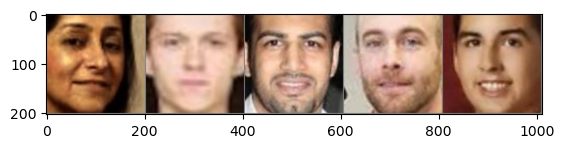

Genero Real:  Mujer Hombre Hombre Hombre Hombre
KNN-Almeida:  Mujer Mujer Hombre Hombre Mujer
MLP-Napoleon: Mujer Hombre Hombre Hombre Hombre
CNN-DW      : Mujer Hombre Hombre Hombre Hombre
CNN-LL      : Mujer Hombre Hombre Hombre Hombre




Raza Real:    Blanco Blanco Indio Blanco Blanco
KNN-Almeida:  Asiático Blanco Blanco Blanco Blanco
MLP-Napoleon: Indio Blanco Otros Blanco Otros
CNN-DW      : Indio Blanco Indio Blanco Otros
CNN-LL      : Indio Blanco Indio Blanco Otros




Edad Real:     42.0  35.0  32.0  29.0  20.0
KNN-Almeida:  20-29 30-39 30-39   0-9 20-29
MLP-Napoleon: 20-29 20-29 30-39 10-19 20-29
CNN-DW      :    33    34    27    28    24
CNN-LL      :    41    34    30    29    23






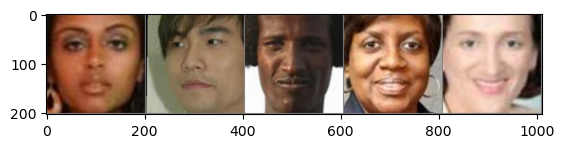

Genero Real:  Mujer Hombre Hombre Mujer Mujer
KNN-Almeida:  Mujer Hombre Hombre Hombre Mujer
MLP-Napoleon: Mujer Hombre Hombre Mujer Mujer
CNN-DW      : Mujer Hombre Hombre Mujer Mujer
CNN-LL      : Mujer Hombre Hombre Mujer Mujer




Raza Real:    Indio Asiático Negro Negro Blanco
KNN-Almeida:  Asiático Indio Negro Asiático Blanco
MLP-Napoleon: Negro Asiático Negro Negro Blanco
CNN-DW      : Negro Asiático Negro Negro Blanco
CNN-LL      : Indio Asiático Negro Negro Blanco




Edad Real:     24.0  23.0  31.0  48.0  32.0
KNN-Almeida:  20-29 20-29 30-39 30-39 20-29
MLP-Napoleon: 30-39 20-29 20-29 40-49 20-29
CNN-DW      :    23    24    32    53    31
CNN-LL      :    24    27    31    59    33






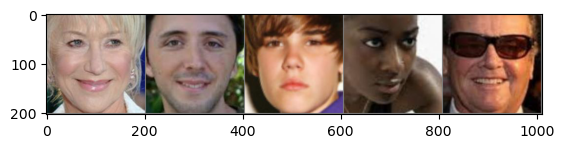

Genero Real:  Mujer Hombre Hombre Mujer Hombre
KNN-Almeida:  Mujer Mujer Mujer Mujer Mujer
MLP-Napoleon: Mujer Hombre Hombre Mujer Hombre
CNN-DW      : Mujer Hombre Hombre Mujer Hombre
CNN-LL      : Mujer Hombre Hombre Mujer Hombre




Raza Real:    Blanco Blanco Blanco Negro Blanco
KNN-Almeida:  Blanco Blanco Blanco Negro Blanco
MLP-Napoleon: Blanco Blanco Blanco Negro Indio
CNN-DW      : Blanco Blanco Blanco Negro Blanco
CNN-LL      : Blanco Blanco Blanco Negro Blanco




Edad Real:     66.0  36.0  16.0  26.0  55.0
KNN-Almeida:  50-59 30-39 10-19 20-29 20-29
MLP-Napoleon: 60-69 30-39 20-29 20-29 50-59
CNN-DW      :    65    27    14    26    56
CNN-LL      :    65    39    16    25    56






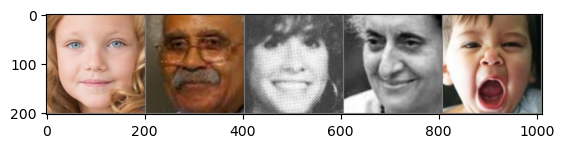

Genero Real:  Mujer Hombre Mujer Mujer Hombre
KNN-Almeida:  Mujer Hombre Mujer Hombre Hombre
MLP-Napoleon: Mujer Hombre Mujer Mujer Hombre
CNN-DW      : Mujer Hombre Mujer Mujer Hombre
CNN-LL      : Mujer Hombre Mujer Mujer Hombre




Raza Real:    Blanco Negro Blanco Indio Blanco
KNN-Almeida:  Blanco Negro Blanco Blanco Asiático
MLP-Napoleon: Blanco Negro Blanco Blanco Blanco
CNN-DW      : Blanco Negro Blanco Blanco Blanco
CNN-LL      : Blanco Negro Blanco Blanco Blanco




Edad Real:      6.0  75.0  36.0  58.0   3.0
KNN-Almeida:    0-9 50-59 20-29 50-59   0-9
MLP-Napoleon: 10-19 80-89 20-29 20-29   0-9
CNN-DW      :     8    75    36    61     1
CNN-LL      :    15    73    35    44     5






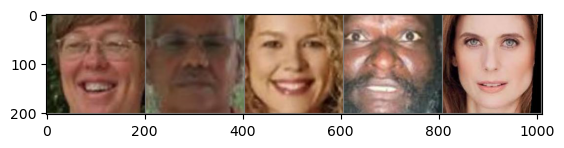

Genero Real:  Mujer Hombre Mujer Hombre Mujer
KNN-Almeida:  Mujer Hombre Hombre Hombre Mujer
MLP-Napoleon: Mujer Hombre Mujer Hombre Mujer
CNN-DW      : Mujer Hombre Mujer Hombre Mujer
CNN-LL      : Mujer Hombre Mujer Hombre Mujer




Raza Real:    Blanco Indio Blanco Negro Blanco
KNN-Almeida:  Blanco Blanco Blanco Blanco Blanco
MLP-Napoleon: Blanco Indio Blanco Negro Blanco
CNN-DW      : Blanco Blanco Blanco Negro Blanco
CNN-LL      : Blanco Blanco Blanco Negro Blanco




Edad Real:     36.0  60.0  26.0  54.0  30.0
KNN-Almeida:  20-29 40-49 40-49 30-39 20-29
MLP-Napoleon: 40-49 50-59 30-39 50-59 40-49
CNN-DW      :    37    47    26    54    30
CNN-LL      :    35    48    28    58    29






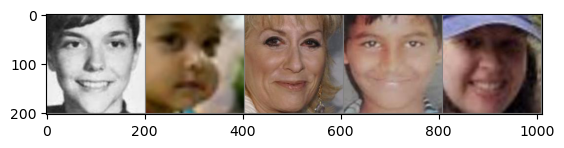

Genero Real:  Mujer Mujer Mujer Hombre Mujer
KNN-Almeida:  Hombre Hombre Hombre Hombre Hombre
MLP-Napoleon: Mujer Mujer Mujer Hombre Mujer
CNN-DW      : Mujer Mujer Mujer Hombre Mujer
CNN-LL      : Mujer Mujer Mujer Hombre Mujer




Raza Real:    Blanco Indio Blanco Indio Blanco
KNN-Almeida:  Blanco Negro Blanco Blanco Blanco
MLP-Napoleon: Blanco Indio Blanco Blanco Negro
CNN-DW      : Blanco Indio Blanco Indio Blanco
CNN-LL      : Blanco Indio Blanco Indio Blanco




Edad Real:     32.0   3.0  69.0  14.0  31.0
KNN-Almeida:  20-29 30-39 10-19 10-19 70-79
MLP-Napoleon: 20-29 10-19 60-69 10-19 20-29
CNN-DW      :    31     4    67    13    31
CNN-LL      :    32     2    87    14    29






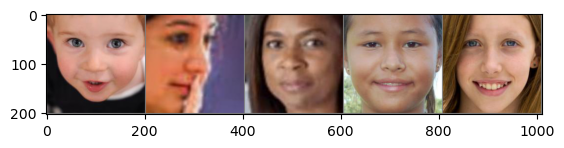

Genero Real:  Hombre Mujer Mujer Mujer Mujer
KNN-Almeida:  Hombre Hombre Mujer Hombre Mujer
MLP-Napoleon: Hombre Mujer Mujer Hombre Mujer
CNN-DW      : Hombre Mujer Mujer Hombre Mujer
CNN-LL      : Hombre Mujer Mujer Hombre Mujer




Raza Real:    Blanco Indio Negro Negro Blanco
KNN-Almeida:  Blanco Blanco Blanco Blanco Blanco
MLP-Napoleon: Blanco Indio Negro Negro Blanco
CNN-DW      : Blanco Indio Negro Otros Blanco
CNN-LL      : Blanco Indio Negro Otros Blanco




Edad Real:      2.0  26.0  39.0  10.0  15.0
KNN-Almeida:    0-9 20-29 30-39 20-29 20-29
MLP-Napoleon:   0-9 20-29 30-39   0-9 10-19
CNN-DW      :     0    25    38    15    16
CNN-LL      :     3    25    41     9    15






In [ ]:
data_iter = iter(dataLoader)
num_batches = 7
batch = 5
for i in range(num_batches):
    imagenes, edades,generos,razas  = next(data_iter)


    #KNN-Almeida
    imagenes_flat = imagenes.view(imagenes.size(0), -1) #Aplanar imagenes
    knn_edad = MbappeEdad.predict(imagenes_flat)
    knn_genero = MbappeGenero.predict(imagenes_flat)
    knn_raza = MbappeRaza.predict(imagenes_flat)

    #MLP-Napoleon
    imgagenes_resize = mlp_trans(imagenes)
    napoleon_edad = NapoleonEdad(imgagenes_resize)
    _, napoleon_edad = torch.max(napoleon_edad, 1)
    napoleon_genero = NapoleonGenero(imgagenes_resize)
    _, napoleon_genero = torch.max(napoleon_genero, 1)
    napoleon_raza = NapoleonRaza(imgagenes_resize)
    _, napoleon_raza = torch.max(napoleon_raza, 1)

    #CNN-DW
    dw_edad = agenteDW.modeloEdad(imagenes)
    dw_genero = agenteDW.modeloGenero(imagenes)
    _, dw_genero = torch.max(dw_genero, 1)
    dw_raza = agenteDW.modeloRaza(imagenes)
    _, dw_raza = torch.max(dw_raza, 1)

    #CNN-LL
    ll_edad = agenteLL.modeloEdad(imagenes)
    ll_genero = agenteLL.modeloGenero(imagenes)
    _, ll_genero = torch.max(ll_genero, 1)
    ll_raza = agenteLL.modeloRaza(imagenes)
    _, ll_raza = torch.max(ll_raza, 1)

    data.mostrarImg(imagenes)
    #Genero
    print('Genero Real: ',' '.join('%5s' % GENERO[generos[j].item()] for j in range(batch)))
    print('KNN-Almeida: ',' '.join('%5s' % GENERO[knn_genero[j]] for j in range(batch)))
    print('MLP-Napoleon:',' '.join('%5s' % GENERO[napoleon_genero[j].item()] for j in range(batch)))
    print('CNN-DW      :',' '.join('%5s' % GENERO[dw_genero[j].item()] for j in range(batch)))
    print('CNN-LL      :',' '.join('%5s' % GENERO[ll_genero[j].item()] for j in range(batch)))
    print('\n')
    print('\n')

    #Raza
    print('Raza Real:   ',' '.join('%5s' % RAZA[razas[j].item()] for j in range(batch)))
    print('KNN-Almeida: ',' '.join('%5s' % RAZA[knn_raza[j]] for j in range(batch)))
    print('MLP-Napoleon:',' '.join('%5s' % RAZA[napoleon_raza[j].item()] for j in range(batch)))
    print('CNN-DW      :',' '.join('%5s' % RAZA[dw_raza[j].item()] for j in range(batch)))
    print('CNN-LL      :',' '.join('%5s' % RAZA[ll_raza[j].item()] for j in range(batch)))
    print('\n')
    print('\n')

    #Edad
    print('Edad Real:   ',' '.join('%5s' % edades[j].item() for j in range(batch)))
    print('KNN-Almeida: ',' '.join('%5s' % EDADES[knn_edad[j]] for j in range(batch)))
    print('MLP-Napoleon:',' '.join('%5s' % EDADES[napoleon_edad[j].item()] for j in range(batch)))
    print('CNN-DW      :',' '.join('%5s' % int(dw_edad[j].item()) for j in range(batch)))
    print('CNN-LL      :',' '.join('%5s' % int(ll_edad[j].item()) for j in range(batch)))
    print('\n')
    print('\n')
   


Por último, nos ha parecido curioso probar con nuestras propias fotos:

In [44]:
ruta_fotos = "./fotos"
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
fotosPersonales = data.Dataset(ruta_fotos,transform=transform) 
fotos = DataLoader(fotosPersonales, batch_size=3, shuffle=True)

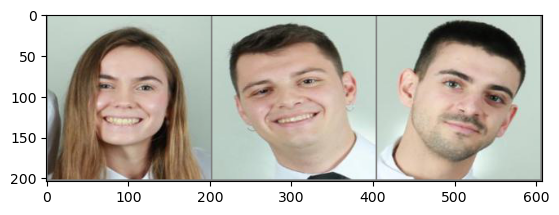

Genero Real:  Mujer Hombre Hombre
KNN-Almeida:  Hombre Hombre Hombre
MLP-Napoleon: Mujer Mujer Mujer
CNN-DW      : Mujer Hombre Hombre
CNN-LL      : Mujer Mujer Mujer


Raza Real:    Blanco Blanco Blanco
KNN-Almeida:  Blanco Asiático Asiático
MLP-Napoleon: Negro Asiático Asiático
CNN-DW      : Negro Blanco Blanco
CNN-LL      : Blanco Asiático Negro


Edad Real:     23.0  24.0  24.0
KNN-Almeida:  20-29   0-9   0-9
MLP-Napoleon: 20-29 20-29 20-29
CNN-DW      :    66    91    52
CNN-LL      :    18    49    29




In [45]:
fotos = iter(fotos)
imagenes, edades,generos,razas  = next(fotos)


#KNN-Almeida
imagenes_flat = imagenes.view(imagenes.size(0), -1) #Aplanar imagenes
knn_edad = MbappeEdad.predict(imagenes_flat)
knn_genero = MbappeGenero.predict(imagenes_flat)
knn_raza = MbappeRaza.predict(imagenes_flat)

    #MLP-Napoleon
imgagenes_resize = mlp_trans(imagenes)
napoleon_edad = NapoleonEdad(imgagenes_resize)
_, napoleon_edad = torch.max(napoleon_edad, 1)
napoleon_genero = NapoleonGenero(imgagenes_resize)
_, napoleon_genero = torch.max(napoleon_genero, 1)
napoleon_raza = NapoleonRaza(imgagenes_resize)
_, napoleon_raza = torch.max(napoleon_raza, 1)

#CNN-DW
dw_edad = agenteDW.modeloEdad(imagenes)
dw_genero = agenteDW.modeloGenero(imagenes)
_, dw_genero = torch.max(dw_genero, 1)
dw_raza = agenteDW.modeloRaza(imagenes)
_, dw_raza = torch.max(dw_raza, 1)

#CNN-LL
ll_edad = agenteLL.modeloEdad(imagenes)
ll_genero = agenteLL.modeloGenero(imagenes)
_, ll_genero = torch.max(ll_genero, 1)
ll_raza = agenteLL.modeloRaza(imagenes)
_, ll_raza = torch.max(ll_raza, 1)

data.mostrarImg(imagenes)
    #Genero
print('Genero Real: ',' '.join('%5s' % GENERO[generos[j].item()] for j in range(3)))
print('KNN-Almeida: ',' '.join('%5s' % GENERO[knn_genero[j]] for j in range(3)))
print('MLP-Napoleon:',' '.join('%5s' % GENERO[napoleon_genero[j].item()] for j in range(3)))
print('CNN-DW      :',' '.join('%5s' % GENERO[dw_genero[j].item()] for j in range(3)))
print('CNN-LL      :',' '.join('%5s' % GENERO[ll_genero[j].item()] for j in range(3)))
print('\n')


    #Raza
print('Raza Real:   ',' '.join('%5s' % RAZA[razas[j].item()] for j in range(3)))
print('KNN-Almeida: ',' '.join('%5s' % RAZA[knn_raza[j]] for j in range(3)))
print('MLP-Napoleon:',' '.join('%5s' % RAZA[napoleon_raza[j].item()] for j in range(3)))
print('CNN-DW      :',' '.join('%5s' % RAZA[dw_raza[j].item()] for j in range(3)))
print('CNN-LL      :',' '.join('%5s' % RAZA[ll_raza[j].item()] for j in range(3)))
print('\n')
 

#Edad
print('Edad Real:   ',' '.join('%5s' % edades[j].item() for j in range(3)))
print('KNN-Almeida: ',' '.join('%5s' % EDADES[knn_edad[j]] for j in range(3)))
print('MLP-Napoleon:',' '.join('%5s' % EDADES[napoleon_edad[j].item()] for j in range(3)))
print('CNN-DW      :',' '.join('%5s' % int(dw_edad[j].item()) for j in range(3)))
print('CNN-LL      :',' '.join('%5s' % int(ll_edad[j].item()) for j in range(3)))
print('\n')
